In [1]:
from tools import *
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [9]:
boxes,names=read_boxes('Txt_results/boxes.txt')
features,_=read_boxes('Txt_results/features.txt',n=3)
# boxes=np.array(boxes[0]).astype(float)
# features=np.array(features[0]).astype(float)
names=np.array(names)

In [7]:
def detectVideoCrowd(video,allBoxes,allFeatures,allnames):
    res_video=[]
    for i in range(len(allBoxes)):
        features,boxes=allFeatures[i],allBoxes[i]
        boxes=np.array(boxes).astype(float)
        features=np.array(features).astype(float)
        names=np.array(allnames[i])
        crowd=cluster_crowd(features[names=='person'],boxes[names=='person'],2,eps=0.9)
        res=visualize(D.data[i].copy(),crowd,vis=False)
        res_video.append(res)
    return res_video

In [10]:
video=detectVideoCrowd(D.data,boxes,features,names)

In [12]:
print (len(video))

4


**Detecting Occupied Chairs**

In [5]:
D=Data({'source': "rb.mp4",'step':0,'size':(416,416,3),'video':1})

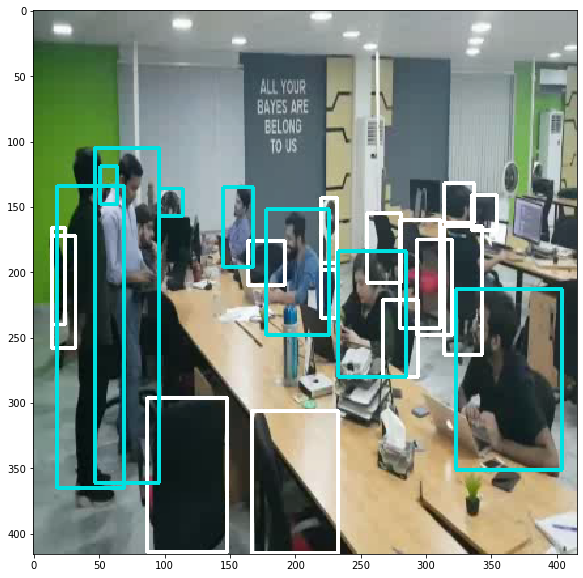

In [4]:
visualize(D.data[0],boxes,names)

(8,)


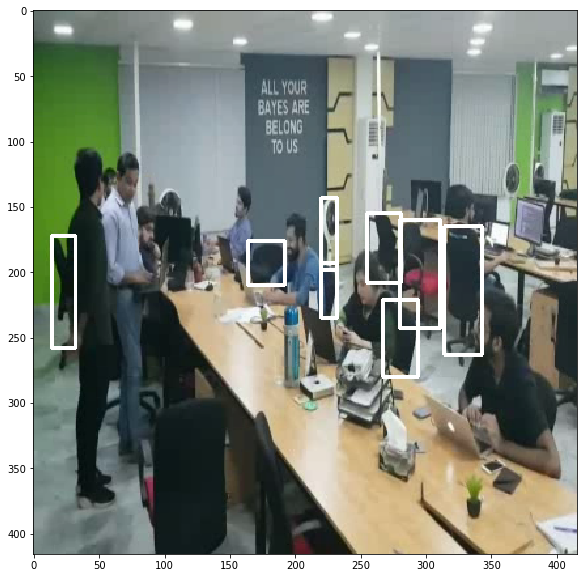

In [5]:
def normalize(boxes):
    return boxes-np.mean(bo)
def occupied(boxes,names,eps=0.05):
    ch_idx=np.where(names=='chair')[0]
    per_idx=np.where(names=='person')[0]
    print (per_idx.shape)
    iou_=iou(boxes[ch_idx],boxes[per_idx])
    Mask=np.zeros_like(iou_,dtype=bool)
    Mask[np.argmax(iou_,axis=0),np.arange(Mask.shape[1],dtype=int)]=True
#     iou_[Mask]=0
    occ=boxes[ch_idx[np.sum(iou_>eps,axis=1)>0]]
    return occ
occupied_chairs=occupied(boxes,names)
visualize(D.data[1].copy(),occupied_chairs)

**Detecting Crowd**

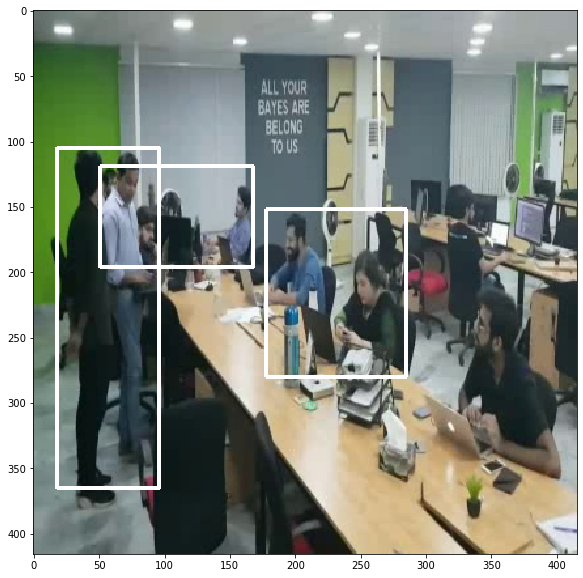

In [8]:
crowd=cluster_crowd(features[names=='person'],boxes[names=='person'],2,eps=0.9)
visualize(D.data[1].copy(),crowd)

In [ ]:
for c,i in enumerate(np.linspace(0.5,2,100)):
    print (c,i)
    img = copy.deepcopy(image)
    print (features)
    cluster_crowd(img,features,boxes_,thickness,ImageDraw.Draw(img),self.colors,2,eps=i,name='./results/'+str(c)+'.jpg')

In [ ]:
images=[]
        for i in range(100):
             images.append(cv2.imread('results/'+str(i)+ '.jpg'))
        return np.array(images),features

In [7]:
for i,c in reversed(list(enumerate(['a','b','c']))):
    print (bool(i),c)

True c
True b
False a


In [14]:
import numpy as np
a=np.arange(3).astype(str)
np.core.defchararray.add(a, '.txt')

array(['0.txt', '1.txt', '2.txt'], dtype='<U25')

In [26]:
import pandas as pd

(225, 225, 255)